In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../')) # This is definitely a bit hacky, but I don't mind
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
#plotting
import numpy as np
import matplotlib.pyplot as plt
utilities.set_plot_style()
import hist
from sidm.tools import histogram as h
importlib.reload(h)

<module 'sidm.tools.histogram' from '/home/cms-jovyan/SiDM/SIDM/sidm/studies/../../sidm/tools/histogram.py'>

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_150GeV_1p2GeV_6p4mm",
    "2Mu2E_200GeV_1p2GeV_4p8mm",
    "2Mu2E_500GeV_1p2GeV_1p9mm",
    "2Mu2E_800GeV_1p2GeV_1p2mm",
    "2Mu2E_1000GeV_1p2GeV_0p96mm",
]
masses = [s.split("_")[1] for s in samples]
channels = ["2mu2e_matchedLj"]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen_resolution"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(
/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(


In [30]:
all_sample_names = utilities.load_yaml("../configs/ntuple_locations.yaml")
for key in all_sample_names["ffntuple_v2"]["samples"].keys():
    if "2Mu2E" not in key and "4Mu" not in key: print(key)
# samples = list(all_sample_names["ffntuple_v4"]["samples"].keys())

DYJetsToLL_M10to50
DYJetsToLL_M50
QCD_Pt1000toInf
QCD_Pt120to170
QCD_Pt15to20
QCD_Pt170to300
QCD_Pt20to30
QCD_Pt300to470
QCD_Pt30to50
QCD_Pt470to600
QCD_Pt50to80
QCD_Pt600to800
QCD_Pt800to1000
QCD_Pt80to120
TTJets
WW
WZ
ZZ


In [26]:
bsamples = [
    "DYJetsToLL_M10to50",
    "DYJetsToLL_M50",
    "TTJets",
    "WW",
    "WZ",
    "ZZ",
    "QCD_Pt1000toInf"
]
fileset = utilities.make_fileset(bsamples, "ffntuple_v2")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    maxchunks=1,
)
# baseNoLj base
bchannels = ["baseNoLj"]
p = sidm_processor.SidmProcessor(
    bchannels,
    ["base"],
)

boutput = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
bout = boutput["out"]

Output()

Output()

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_n']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_eta', 'electron_phi']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'photon_n']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_eta', 'photon_phi']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_lj_dR']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_lj_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR_reallyLowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'ljlj_absdphi', 'lj_pfIsolationPt05']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'ljlj_absdphi', 'lj_pfIsolationPt05']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'ljlj_absdphi', 'lj_pfIsolationPt05']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'ljlj_absdphi', 'lj_pfIsolationPt05']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_n']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_eta', 'electron_phi']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'photon_n']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_eta', 'photon_phi']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_lj_dR']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_lj_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR_reallyLowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'ljlj_absdphi', 'lj_pfIsolationPt05']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_n']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_eta', 'electron_phi']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'photon_n']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_eta', 'photon_phi']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_lj_dR']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_lj_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR_reallyLowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'ljlj_absdphi', 'lj_pfIsolationPt05']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: electrons not found in this sample. Skipping.

Warning: photons not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Warning: Unable to apply looseID for muons. Skipping.

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Warning: Unable to apply ifcsczero for dsaMuons. Skipping.

Warning: Unable to apply segOverlap < 0.66 for dsaMuons. Skipping.

Warning: Unable to apply extrapolatedDr > 0.2 for dsaMuons. Skipping.

Warning: Unable to apply isSubsetAnyPFMuon False for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC hits > 12 for dsaMuons. Skipping.

Warning: Unable to apply DT + CSC stations >= 2 for dsaMuons. Skipping.

Warning: Unable to apply ptErrorOverPT < 1 for dsaMuons. Skipping.

Warning: electrons not found in sample. The following cuts will not be applied: ['pT > 10 GeV', '|eta| < 2.4', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   muons :  looseID

Warning: photons not found in sample. The following cuts will not be applied: ['pT > 20 GeV', '|eta| < 2.5', 
'looseID']

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ifcsczero

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  segOverlap < 0.66

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  extrapolatedDr > 0.2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  isSubsetAnyPFMuon False

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC hits > 12

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  DT + CSC stations >= 2

Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this 
JaggedSelection.   dsaMuons :  ptErrorOverPT < 1

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_n']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_eta', 'electron_phi']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'photon_n']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_pt']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_eta', 'photon_phi']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'muon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'dsaMuon_absD0_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_lj_dR']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'electron_lj_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR_lowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'photon_lj_dR_reallyLowRange']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt05']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPtNoPU07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'lj_pfIsolationPt07']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 
'ljlj_absdphi', 'lj_pfIsolationPt05']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

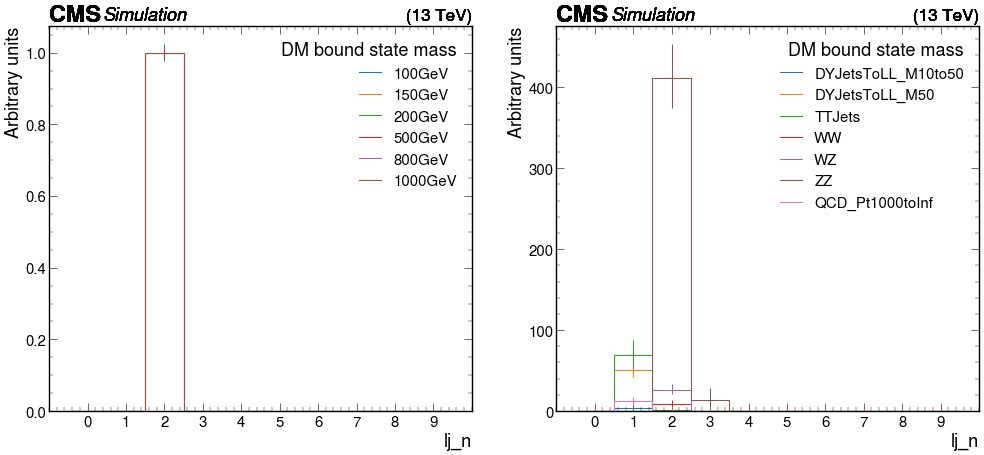

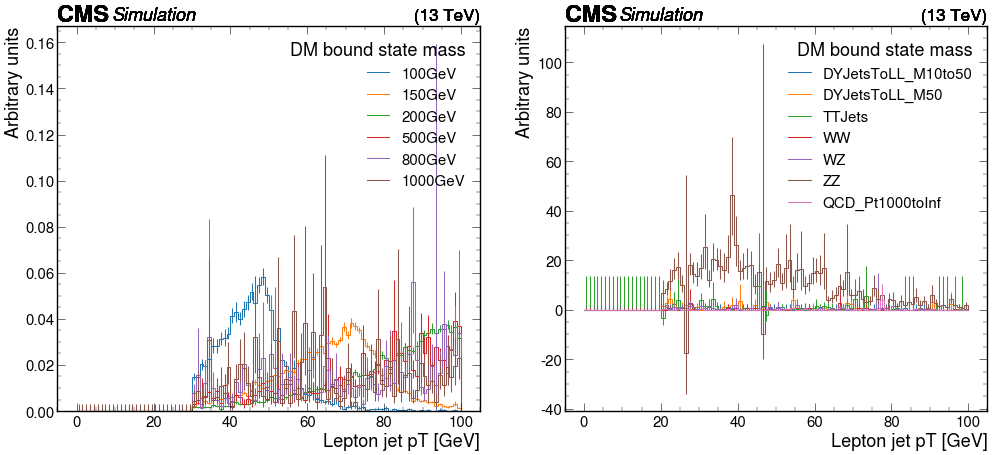

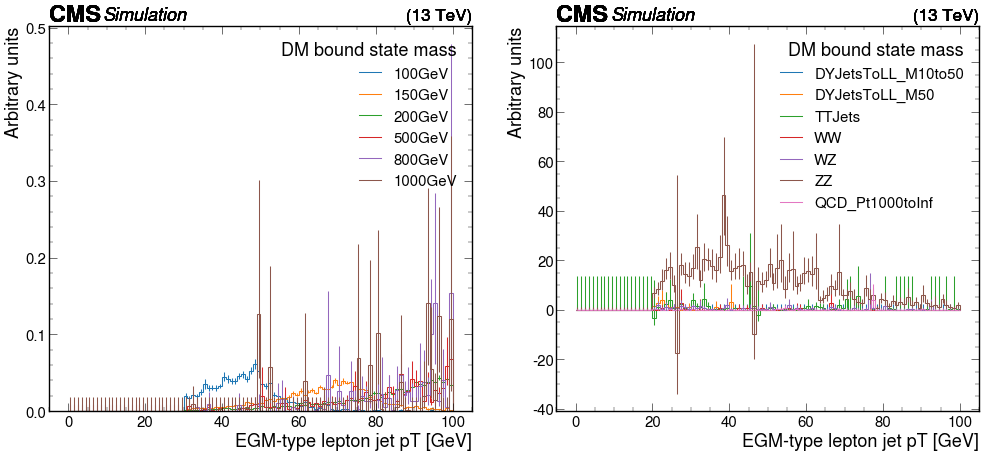

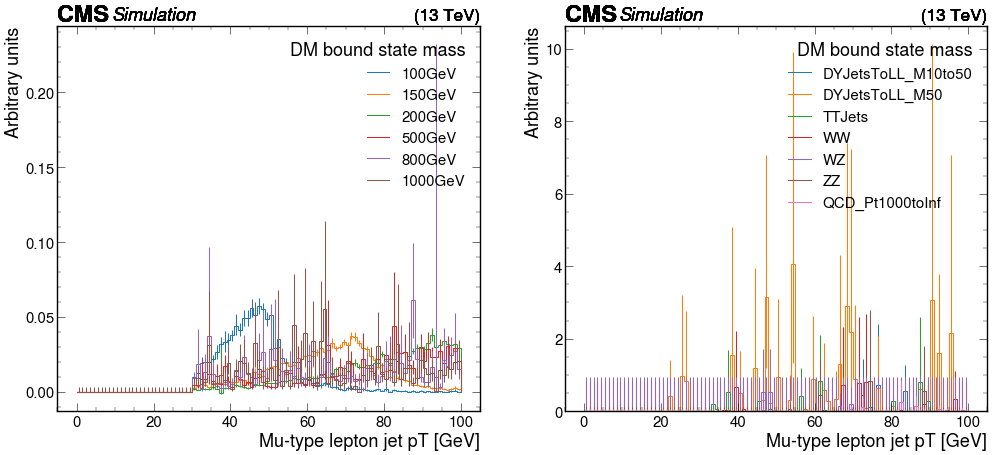

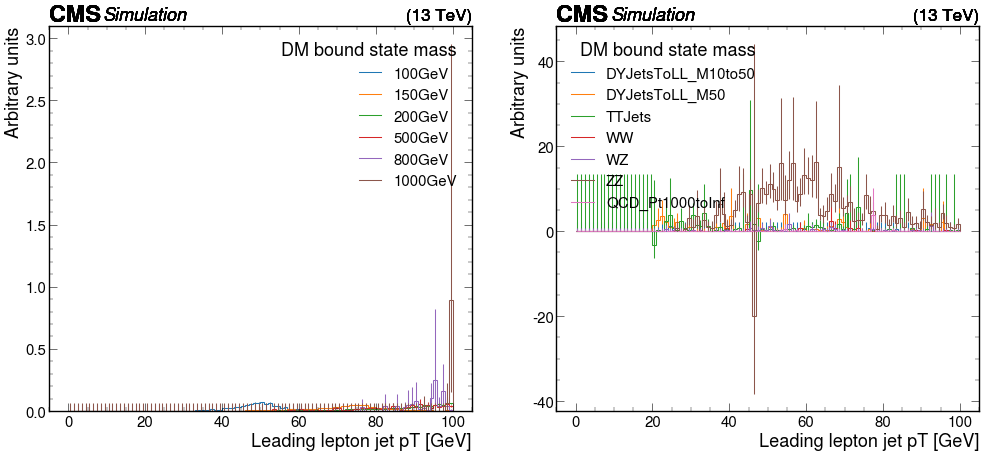

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


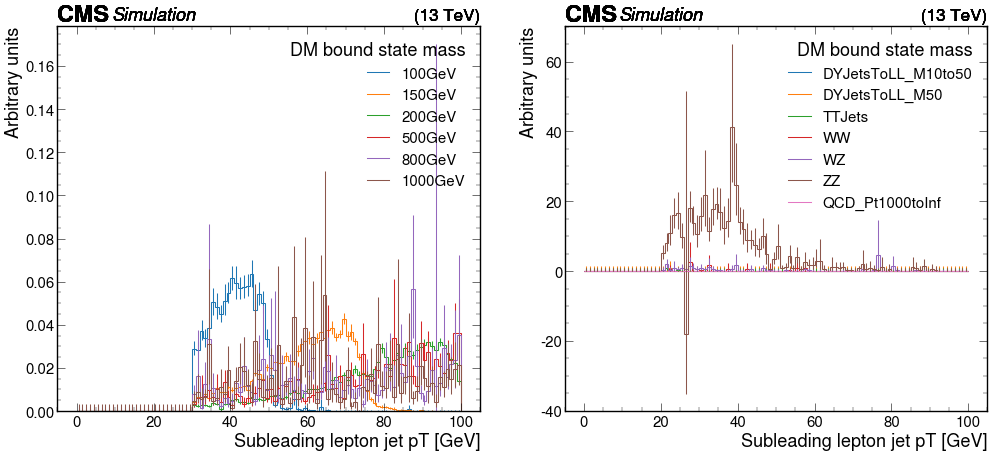

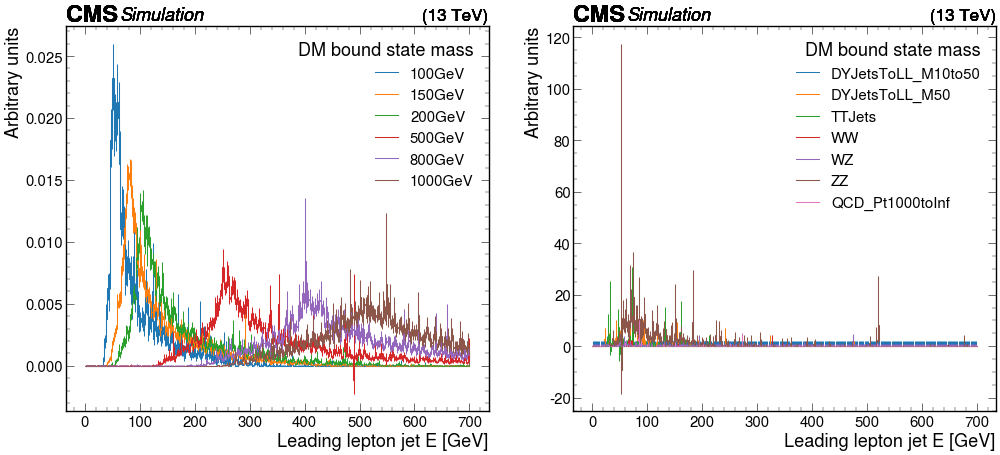

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


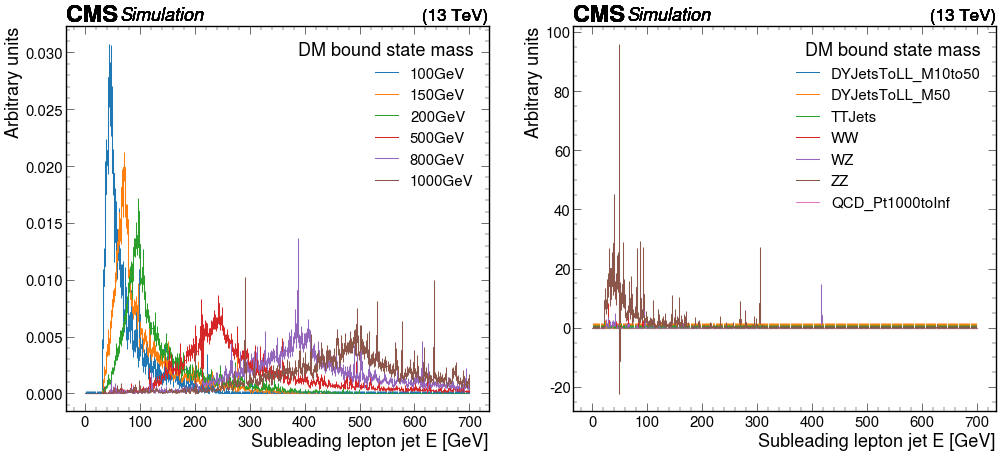

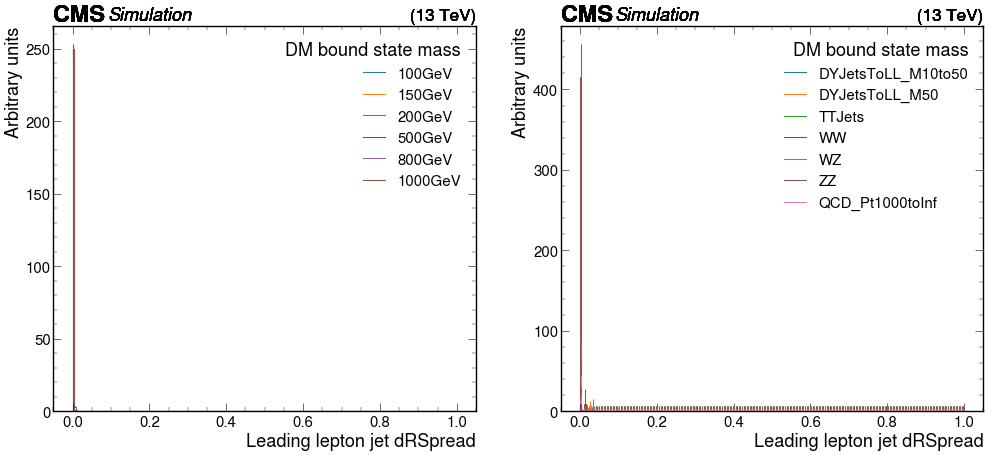

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


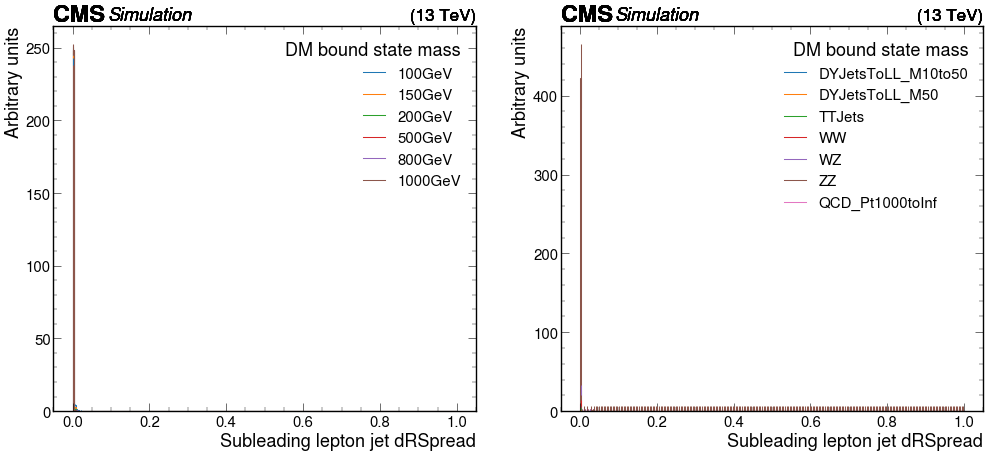

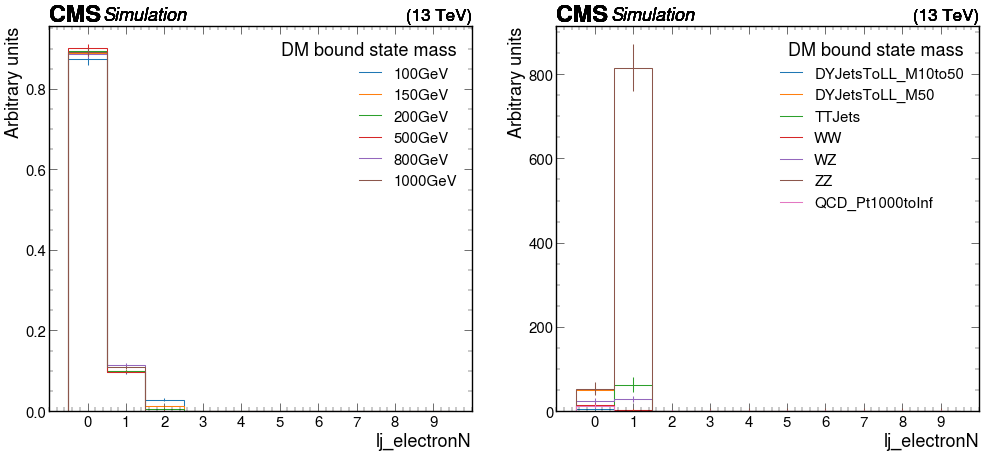

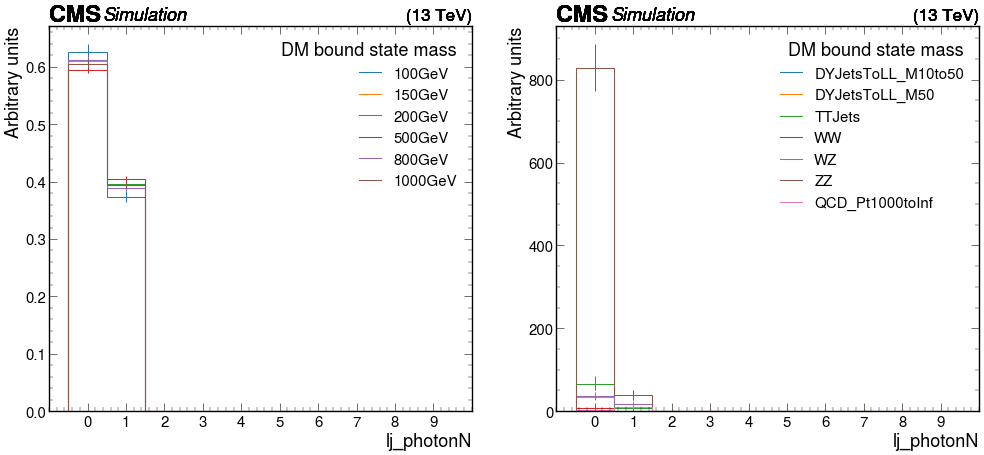

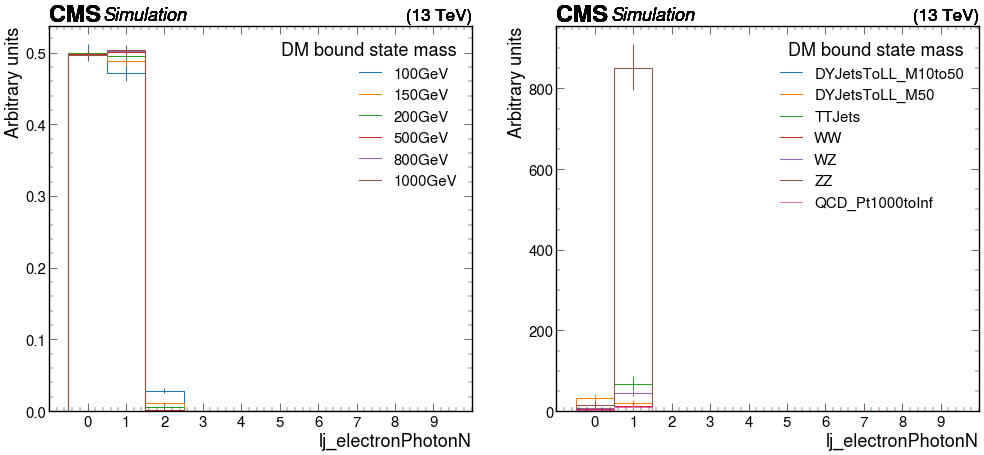

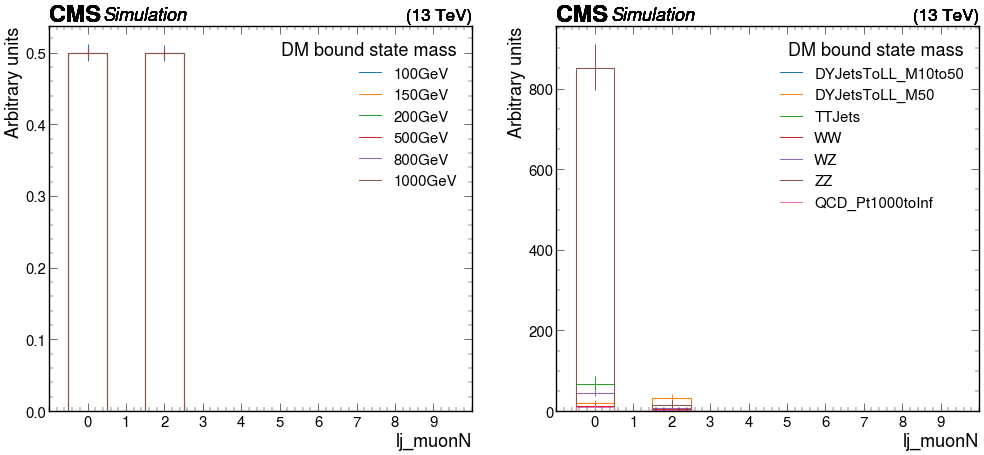

In [27]:
for histname in ["lj_n",
"lj_pt",
"egm_lj_pt",
"mu_lj_pt",
"lj0_pt",
"lj1_pt",
"lj0_e",
"lj1_e",
"lj0_dRSpread",
"lj1_dRSpread",
"lj_electronN",
"lj_photonN",
"lj_electronPhotonN",
"lj_muonN"]:
    nplots = 2
    plt.subplots(1, nplots, figsize=(nplots*12, 10), dpi=50)
    plt.subplot(1, nplots, 1)
    for sample in samples:
        utilities.plot(out[sample]["hists"][histname][channels[0], :], density=True, flow=None)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    plt.subplot(1, nplots, 2)
    for sample in bsamples:
        utilities.plot(bout[sample]["hists"][histname][bchannels[0], :], density=False, flow=None)
    plt.legend(bsamples, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    # plt.ylim(bottom=0)
    plt.show()

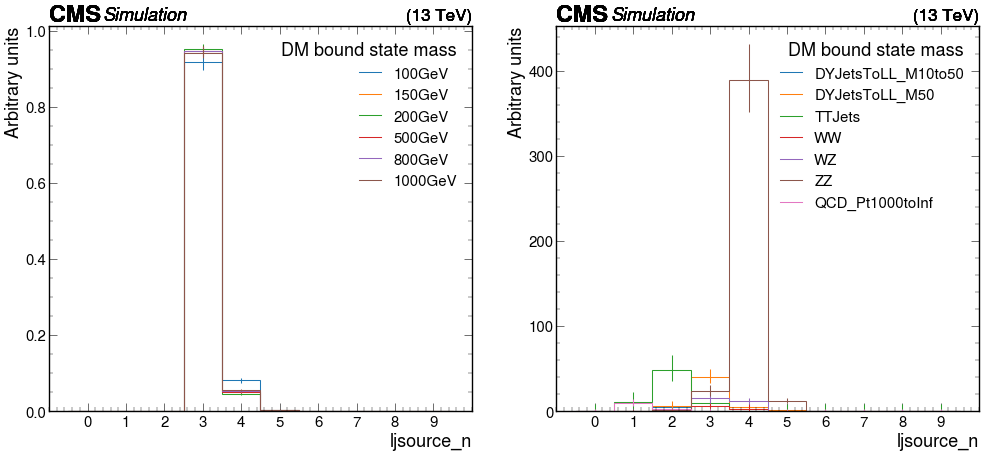

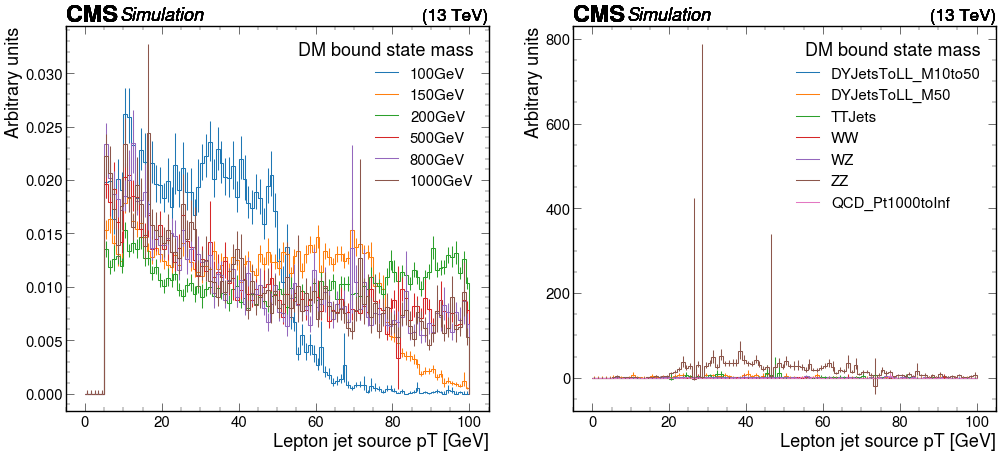

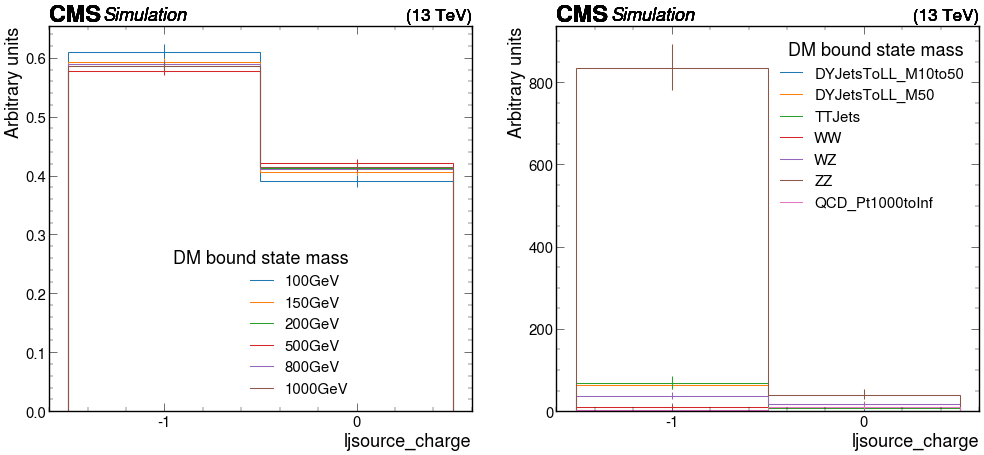

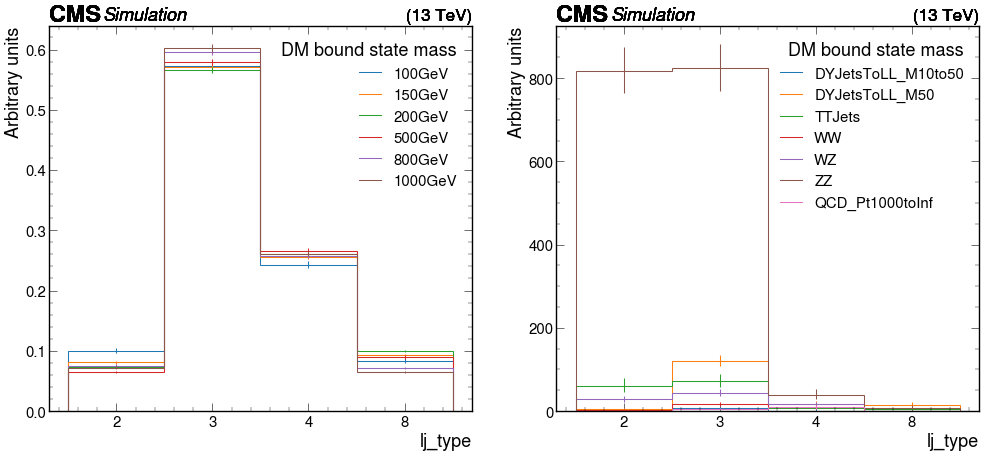

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


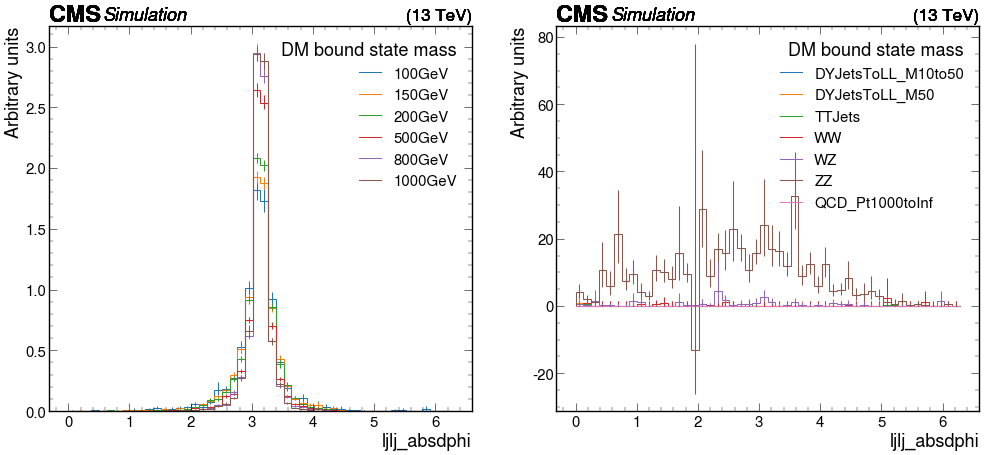

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


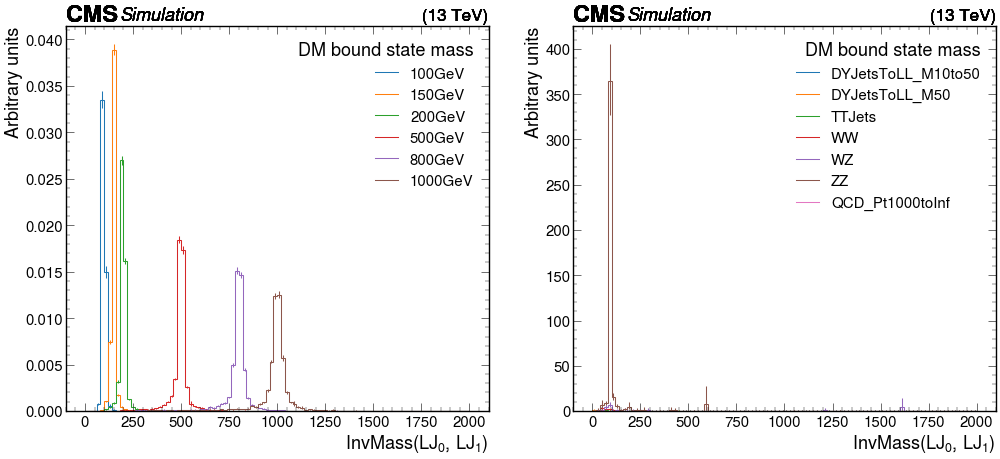

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


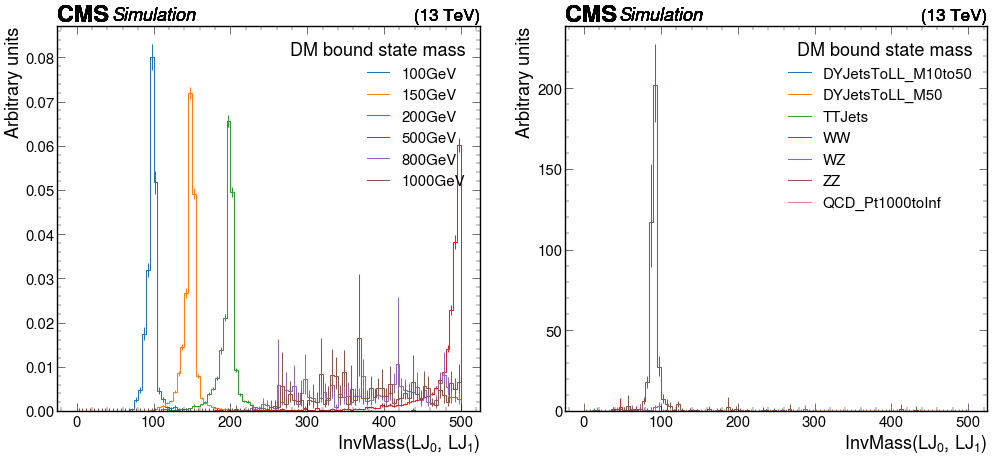

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/

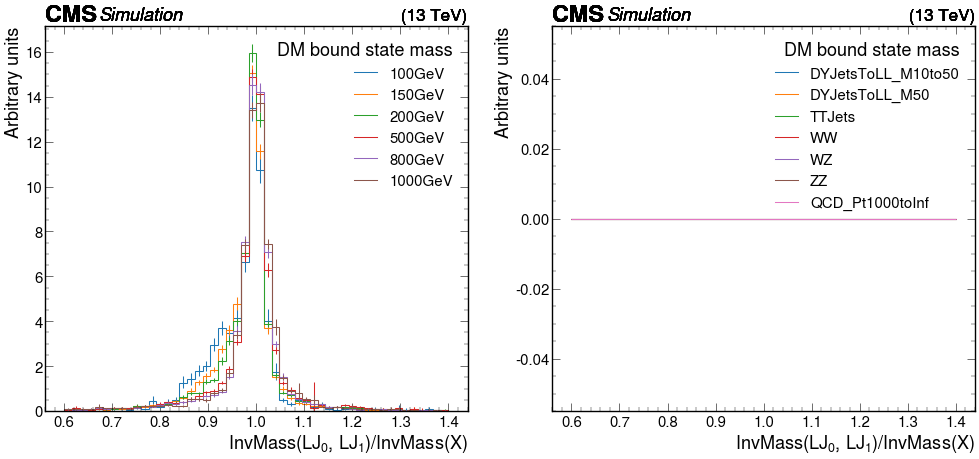

In [28]:
for histname in ["ljsource_n",
"ljsource_pt",
"ljsource_charge",
"ljsource_type",
"lj_lj_absdphi",
"lj_lj_invmass",
"lj_lj_invmass_lowRange",
"lj_lj_invmass_resolution"
]:
    nplots = 2
    plt.subplots(1, nplots, figsize=(nplots*12, 10), dpi=50)
    plt.subplot(1, nplots, 1)
    for sample in samples:
        utilities.plot(out[sample]["hists"][histname][channels[0], :], density=True, flow=None)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    plt.subplot(1, nplots, 2)
    for sample in bsamples:
        utilities.plot(bout[sample]["hists"][histname][bchannels[0], :], density=False, flow=None)
    plt.legend(bsamples, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    # plt.ylim(bottom=0)
    plt.show()

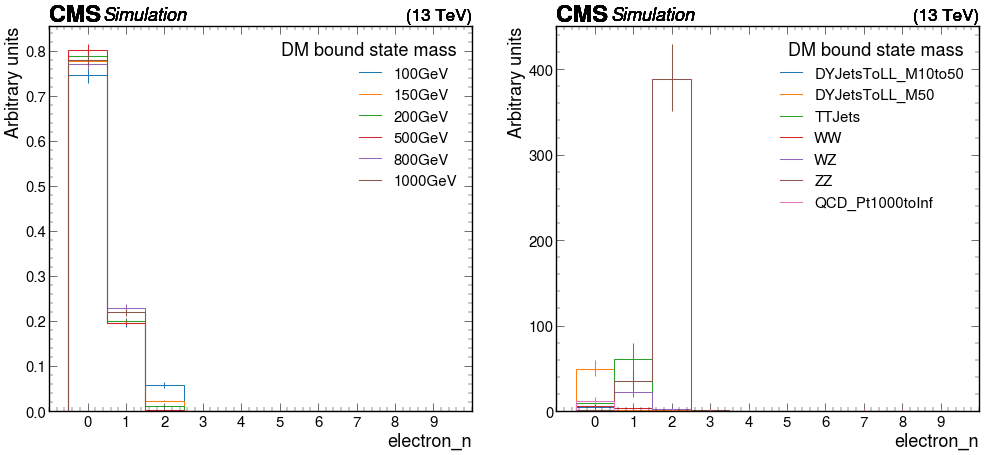

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


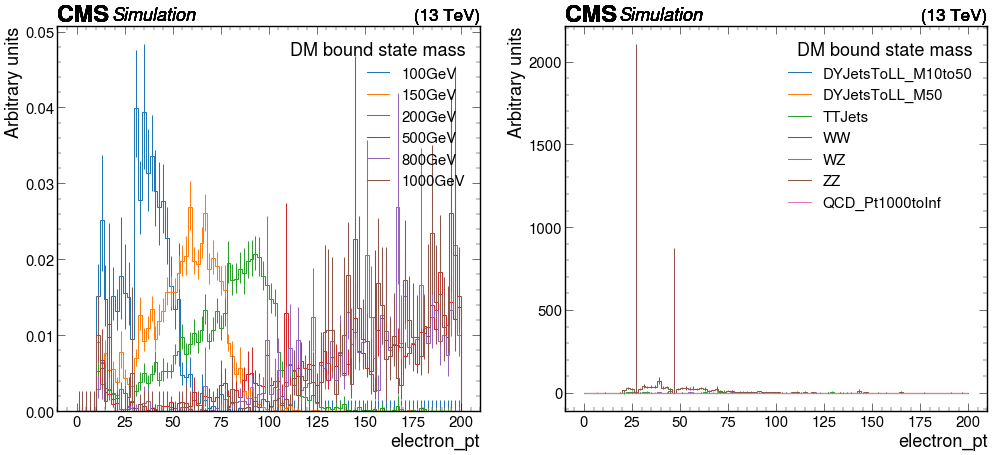

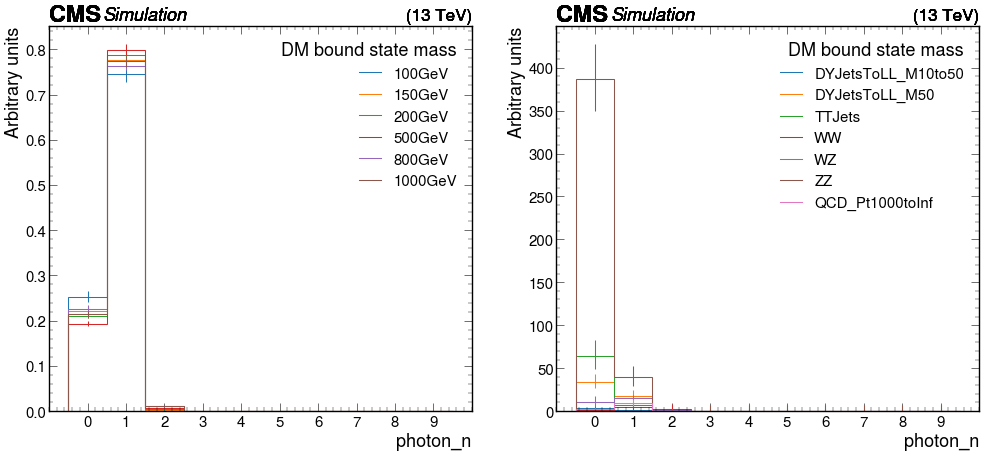

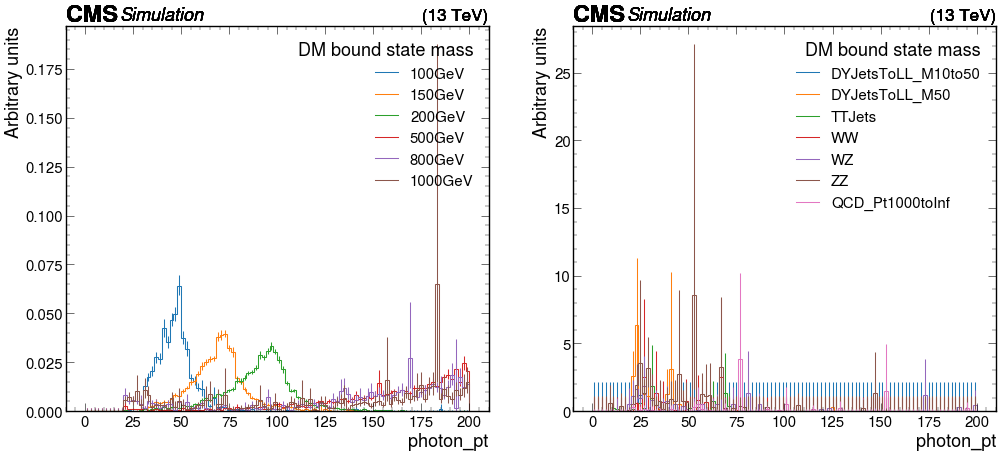

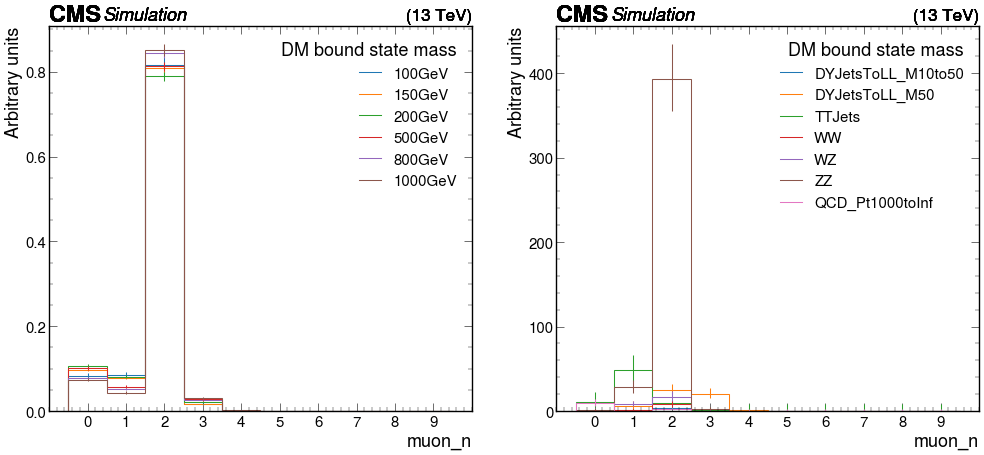

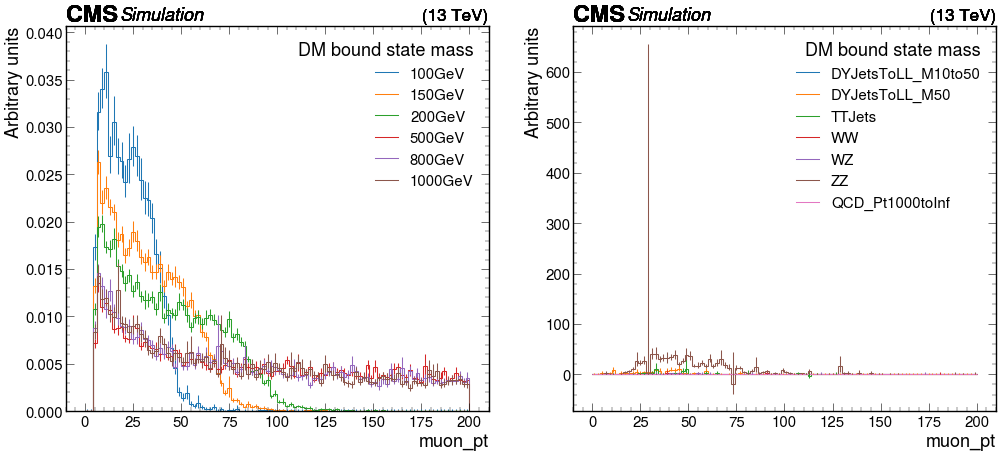

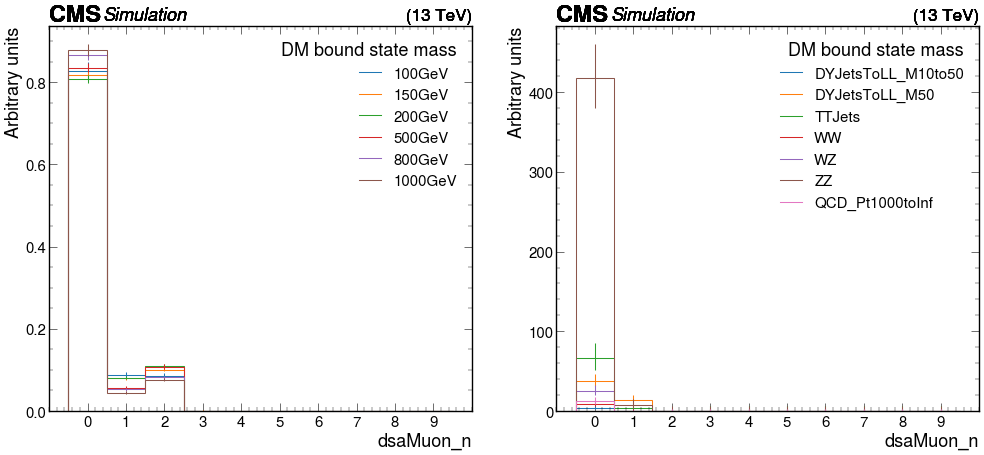

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


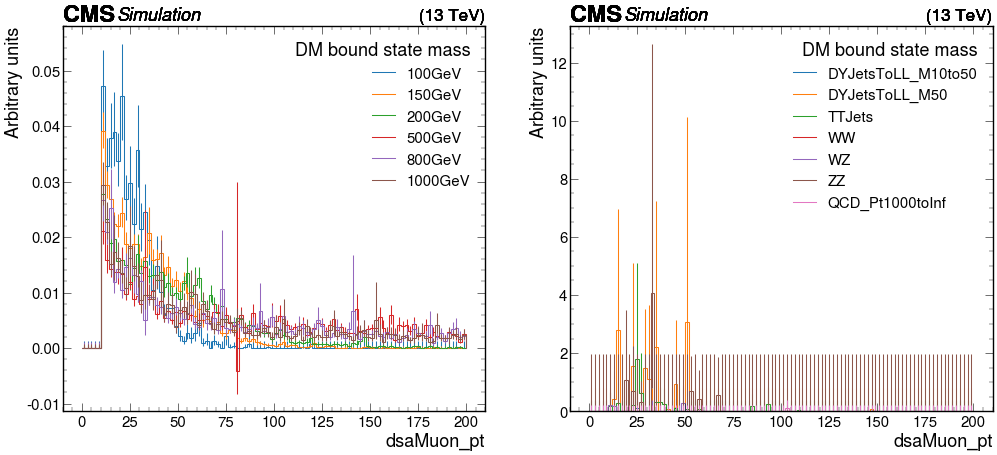

In [29]:
for histname in [
# "electron_n",
# "electron_pt",
"ljs_electron_n",
"ljs_electron_pt",
# "photon_n",
# "photon_pt",
"ljs_photon_n",
"ljs_photon_pt",
# "muon_n",
# "muon_pt",
# "muon_absD0",
# "muon_absD0_lowRange",
"ljs_muon_n",
"ljs_muon_pt",
# "dsaMuon_n",
# "dsaMuon_pt",
# "dsaMuon_absD0",
# "dsaMuon_absD0_lowRange",
"ljs_dsaMuon_n",
"ljs_dsaMuon_pt",
]:
    nplots = 2
    plt.subplots(1, nplots, figsize=(nplots*12, 10), dpi=50)
    plt.subplot(1, nplots, 1)
    for sample in samples:
        utilities.plot(out[sample]["hists"][histname][channels[0], :], density=True, flow=None)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    plt.subplot(1, nplots, 2)
    for sample in bsamples:
        utilities.plot(bout[sample]["hists"][histname][bchannels[0], :], density=False, flow=None)
    plt.legend(bsamples, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    # plt.ylim(bottom=0)
    plt.show()